In [65]:
import torch
import sys
sys.path.append('../')
from DataType.ElectricField import ElectricField
#from Components.Hologram_v2 import HologramElement
from Props.RSC_Prop import RSC_prop
from Props.CZT_Prop import CZT_prop
from utils.Helper_Functions import normalize
import numpy as np
import scipy.io
import time
import torch.nn as nn
from utils.units import *

In [88]:
from DataType.ElectricField import ElectricField
# ElectricFields are 4D objects: 
# B x C x H x W
# BATCH x Channel (Wavelength) x Height x Width

N = 1024
field_data = torch.zeros(1,5,N,N) + 0j # 0j to make it complex

# Set ones to the field
field_data[...,N//4 : 3 * N//4, N//4 : 3 * N//4] = 1

# Cast into our Datatype
field_input = ElectricField(
    data = field_data, 
    wavelengths = [600 * nm, 660 * nm, 720 * nm, 760 * nm, 800 * nm],
    spacing = 6.4 * um,
)

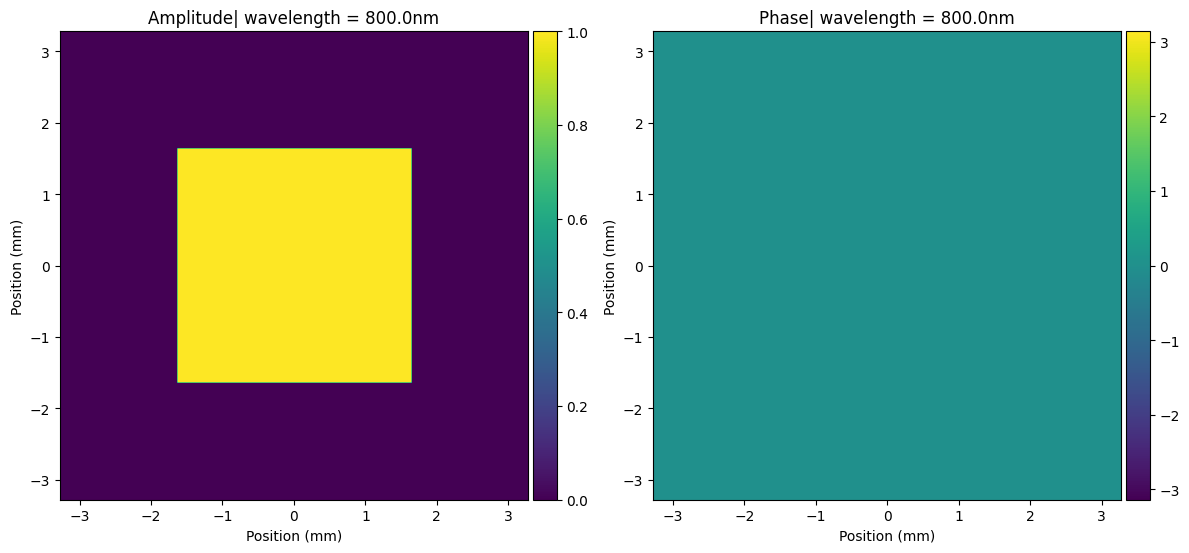

In [89]:
field_input.visualize(figsize=(12, 12), wavelength=800 * nm, flag_axis=True, intensity=False)

In [106]:
rsc_prop = RSC_prop(z_distance=200 * mm)

In [107]:
import time
 
# record start time
start = time.time()

field_propagated_rsc = rsc_prop.forward(
    field = field_input
)

# record end time
end = time.time()

# print the difference between start 
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

Minimum propagation distance to satisfy energy conservation: 139.561 mm
Minimum propagation distance to satisfy sampling for FT: 139.656 mm
The simulation will be accurate !
The time of execution of above program is : 17.380475997924805 ms


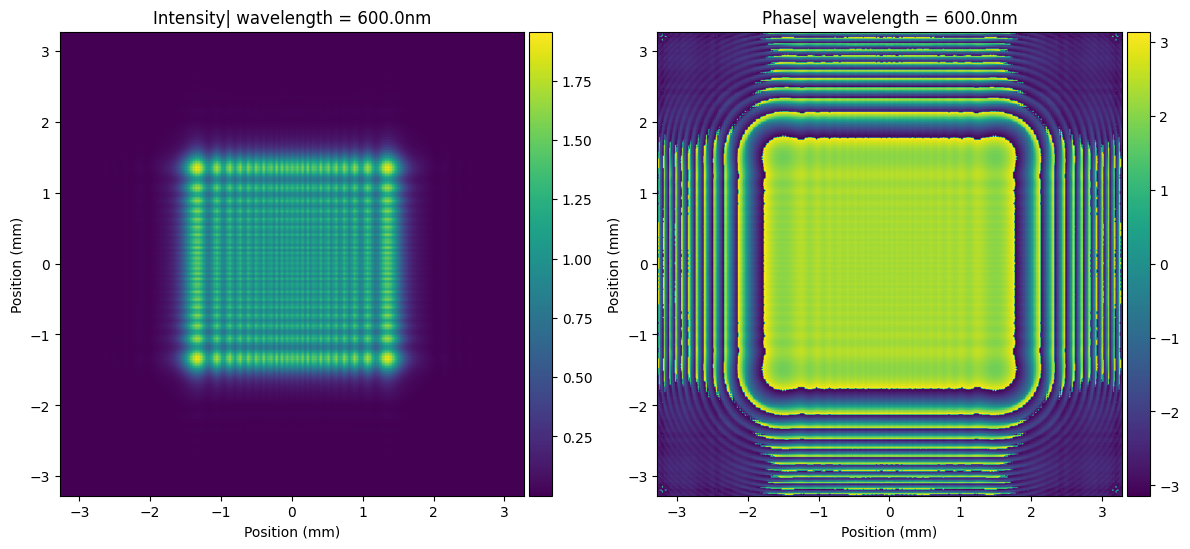

In [108]:
field_propagated_rsc.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [109]:
czt_prop = CZT_prop(z_distance=200 * mm)

In [110]:
import time
 
# record start time
start = time.time()

field_propagated_czt = czt_prop.forward(
    field = field_input
)


# record end time
end = time.time()
 
# print the difference between start 
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 9.85407829284668 ms


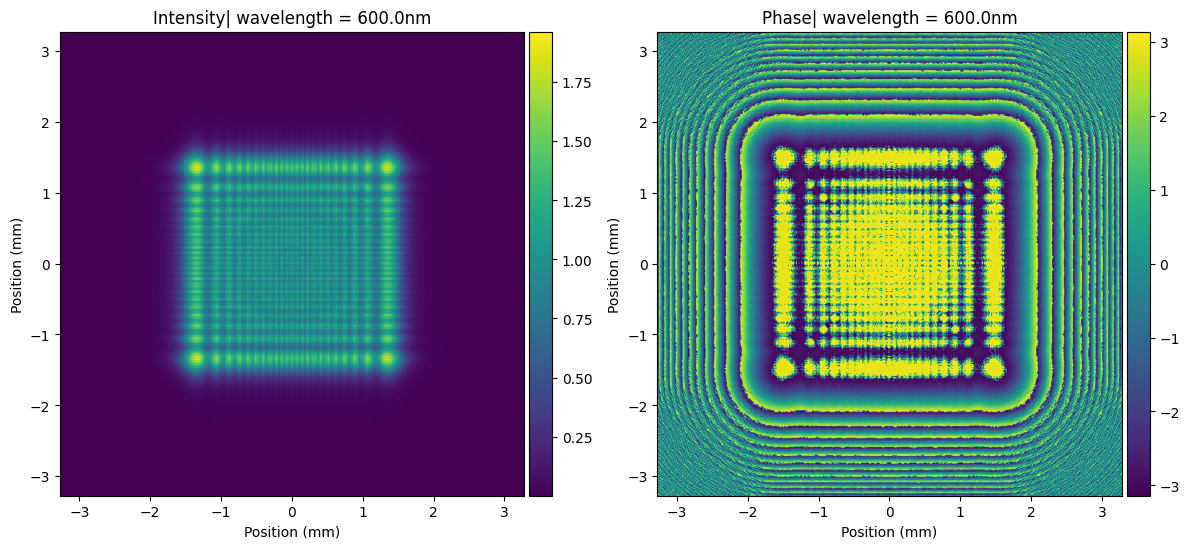

In [111]:
field_propagated_czt.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [112]:
field_propagated_czt = czt_prop.forward(
    field = field_input,
    outputHeight=2024,
	outputWidth=2024, 						
	outputPixel_dx=2 * um, 
	outputPixel_dy=2 * um,
)

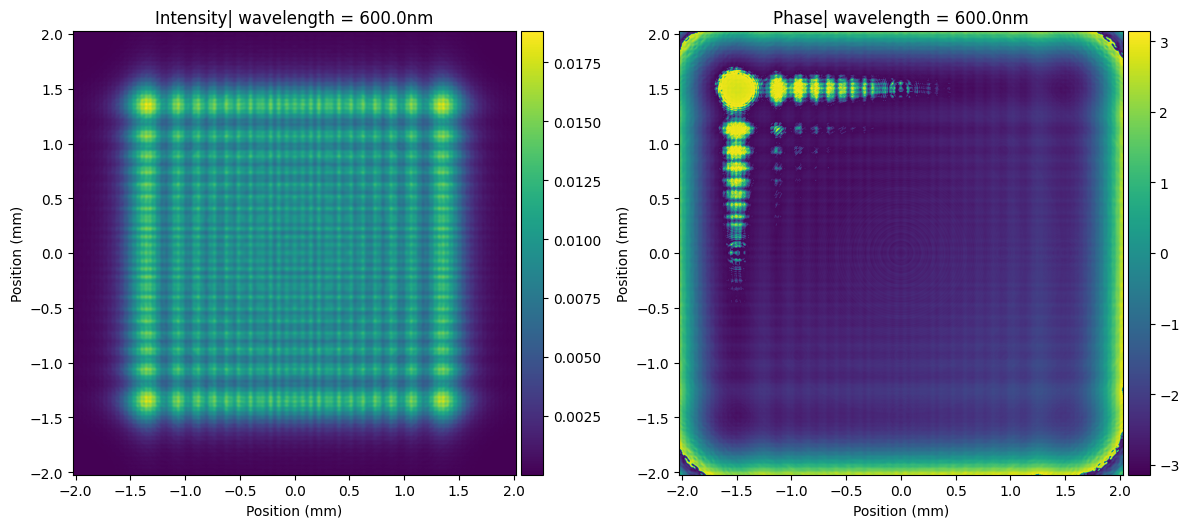

In [113]:
field_propagated_czt.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)